In [1]:
using Plots
using CSV
using DataFrames
using FreqTables
using Vega

## Line charts



In [2]:
csv_reader = CSV.File("winemag-data_first150k.csv")
df = DataFrame(csv_reader)

,Column1,country,description
,Int64,String31?,String
1,0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030."
2,1,Spain,"Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023."
3,2,US,"Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar."
4,3,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032."
5,4,France,"This is the top wine from La Bégude, named after the highest point in the vineyard at 1200 feet. It has structure, density and considerable acidity that is still calming down. With 18 months in wood, the wine has developing an extra richness and concentration. Produced by the Tari family, formerly of Château Giscours in Margaux, it is a wine made for aging. Drink from 2020."
6,5,Spain,"Deep, dense and pure from the opening bell, this Toro is a winner. Aromas of dark ripe black fruits are cool and moderately oaked. This feels massive on the palate but sensationally balanced. Flavors of blackberry, coffee, mocha and toasty oak finish spicy, smooth and heady. Drink this exemplary Toro through 2023."
7,6,Spain,"Slightly gritty black-fruit aromas include a sweet note of pastry along with a hint of prune. Wall-to-wall saturation ensures that all corners of one's mouth are covered. Flavors of blackberry, mocha and chocolate are highly impressive and expressive, while this settles nicely on a long finish. Drink now through 2024."
8,7,Spain,"Lush cedary black-fruit aromas are luxe and offer notes of marzipan and vanilla. This bruiser is massive and tannic on the palate, but still lush and friendly. Chocolate is a key flavor, while baked berry and cassis flavors are hardly wallflowers. On the finish, this is tannic and deep as a sea trench. Drink this saturated black-colored Toro through 2023."
9,8,US,"This re-named vineyard was formerly bottled as deLancellotti. You'll find striking minerality underscoring chunky black fruits. Accents of citrus and graphite comingle, with exceptional midpalate concentration. This is a wine to cellar, though it is already quite enjoyable. Drink now through 2030."


In [3]:
names(df)

11-element Vector{String}:
 "Column1"
 "country"
 "description"
 "designation"
 "points"
 "price"
 "province"
 "region_1"
 "region_2"
 "variety"
 "winery"

## Bar charts and categorical data
They map categories to numbers: wine-producing provinces of the world (category) to the number of labels of wines they produce (number):

In [4]:
df_freq = freqtable(df.province)

456-element Named Vector{Int64}
Dim1                                     │ 
─────────────────────────────────────────┼────
"Achaia"                                 │   2
"Aconcagua Costa"                        │   5
"Aconcagua Valley"                       │ 194
"Aegean"                                 │  16
"Ahr"                                    │   5
"Aigialias Slopes"                       │   2
"Alenquer"                               │   7
"Alentejano"                             │ 872
"Alentejo"                               │ 148
"Alenteo"                                │   2
"Algarve"                                │  11
⋮                                            ⋮
"Wellington"                             │  34
"Western Australia"                      │ 491
"Western Cape"                           │ 516
"Wiener Gemischter Satz"                 │   5
"Württemberg"                            │  15
"Zenata"                                 │   8
"Zitsa"                        

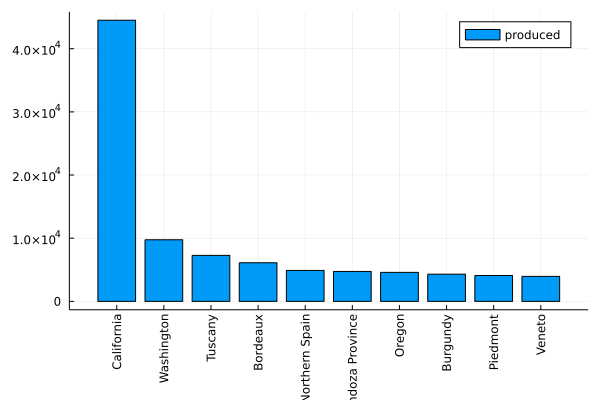

In [5]:
bar_df = DataFrame(a=Array(df_freq), b=names(df_freq)[1])
bar_df = sort!(bar_df, [:a], rev=true)
bar_df = first(bar_df, 10)
p = bar(bar_df.b, bar_df.a, xrotation=90, label = "produced")


In [6]:
bar_df.prop = bar_df.a / sum(eachrow(bar_df[!, "a"]))[1]

10-element Vector{Float64}:
 0.4723035782503502
 0.10346364446708264
 0.07726346619126448
 0.06484782885521456
 0.051912220382868544
 0.050320472006451886
 0.0486968886625069
 0.04571501337068636
 0.04343350736448916
 0.042043380449085274

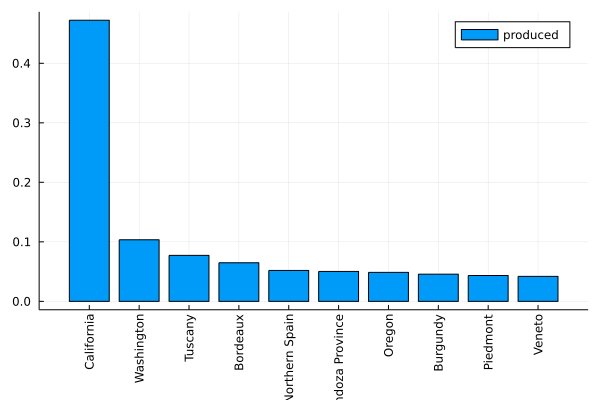

In [7]:
p = bar(bar_df.b, bar_df.prop, xrotation=90, label = "produced")


Bar charts are very flexible: The height can represent anything, as long as it is a number. And each bar can represent anything, as long as it is a category.

In this case the categories are nominal categories: "pure" categories that don't make a lot of sense to order. Nominal categorical variables include things like countries, ZIP codes, types of cheese, and lunar landers. The other kind are ordinal categories: things that do make sense to compare, like earthquake magnitudes, housing complexes with certain numbers of apartments, and the sizes of bags of chips at your local deli.

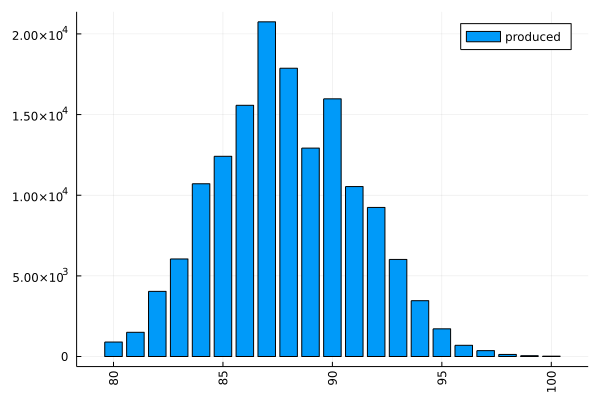

In [8]:
df_freq = freqtable(df.points)
bar_df = DataFrame(a=Array(df_freq), b=names(df_freq)[1])
bar_df = sort!(bar_df, [:b], rev=true)
p = bar(bar_df.b, bar_df.a, xrotation=90, label = "produced")


As you can see, every vintage is allotted an overall score between 80 and 100; and, if we are to believe that Wine Magazine is an arbiter of good taste, then a 92 is somehow meaningfully "better" than a 91.

## Line charts
The wine review scorecard has 20 different unique values to fill, for which our bar chart is just barely enough. What would we do if the magazine rated things 0-100? We'd have 100 different categories; simply too many to fit a bar in for each one!

In that case, instead of bar chart, we could use a line chart:

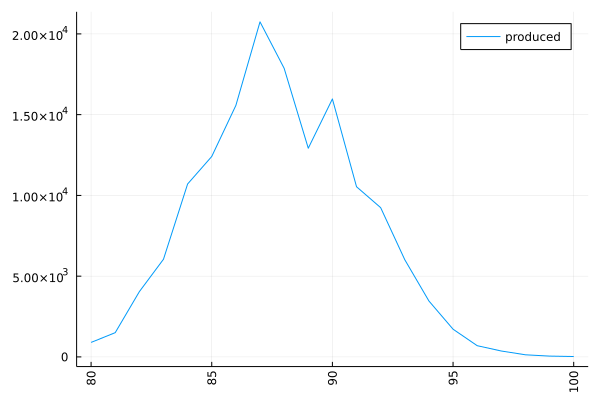

In [9]:
p = plot(bar_df.b, bar_df.a, xrotation=90, label = "produced")

A line chart can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories.

However, line charts have an important weakness: unlike bar charts, they're not appropriate for nominal categorical data. While bar charts distinguish between every "type" of point line charts mushes them together. So a line chart asserts an order to the values on the horizontal axis, and the order won’t make sense with some data. After all, a "descent" from California to Washington to Tuscany doesn't mean much!

Line charts also make it harder to distinguish between individual values.

In general, if your data can fit into a bar chart, just use a bar chart!

## Interval data
Let's move on by looking at yet another type of data, an interval variable.

Examples of interval variables are the wind speed in a hurricane, shear strength in concrete, and the temperature of the sun. An interval variable goes beyond an ordinal categorical variable: it has a meaningful order, in the sense that we can quantify what the difference between two entries is itself an interval variable.

For example, if I say that this sample of water is -20 degrees Celcius, and this other sample is 120 degrees Celcius, then I can quantify the difference between them: 140 degrees "worth" of heat, or such-and-such many joules of energy.

Line charts work well for interval data. Bar charts don't—unless your ability to measure it is very limited, interval data will naturally vary by quite a lot.

Let's apply a new tool, the histogram, to an interval variable in our dataset, price (we'll cut price off at 200$ a bottle; more on why shortly).

## Histograms
Here's a histogram:

In [10]:
df.price

150930-element Vector{Union{Missing, Float64}}:
 235.0
 110.0
  90.0
  65.0
  66.0
  73.0
  65.0
 110.0
  65.0
  60.0
  80.0
  48.0
  48.0
   ⋮
  38.0
  37.0
  19.0
  38.0
    missing
  30.0
  70.0
  20.0
  27.0
  20.0
  52.0
  15.0

In [11]:
dropmissing!(df, disallowmissing=false)


,Column1,country,description
,Int64,String31?,String
1,0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030."
2,2,US,"Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar."
3,3,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032."
4,8,US,"This re-named vineyard was formerly bottled as deLancellotti. You'll find striking minerality underscoring chunky black fruits. Accents of citrus and graphite comingle, with exceptional midpalate concentration. This is a wine to cellar, though it is already quite enjoyable. Drink now through 2030."
5,9,US,"The producer sources from two blocks of the vineyard for this wine—one at a high elevation, which contributes bright acidity. Crunchy cranberry, pomegranate and orange peel flavors surround silky, succulent layers of texture that present as fleshy fruit. That delicately lush flavor has considerable length."
6,11,US,"From 18-year-old vines, this supple well-balanced effort blends flavors of mocha, cherry, vanilla and breakfast tea. Superbly integrated and delicious even at this early stage, this wine seems destined for a long and savory cellar life. Drink now through 2028."
7,12,US,"A standout even in this terrific lineup of 2015 releases from Patricia Green, the Weber opens with a burst of cola and tobacco scents and accents. It continues, subtle and detailed, with flavors of oranges, vanilla, tea and milk chocolate discreetly threaded through ripe blackberry fruit."
8,14,US,"With its sophisticated mix of mineral, acid and tart fruits, this seductive effort pleases from start to finish. Supple and dense, it's got strawberry, blueberry, plum and black cherry, a touch of chocolate, and that underlying streak of mineral. All these elements are in good proportion and finish with an appealing silky texture. It's delicious already, but give it another decade for full enjoyment. Drink now through 2028."
9,15,US,"First made in 2006, this succulent luscious Chardonnay is all about minerality. It's got a rich core of butterscotch and the seemingly endless layers of subtle flavors that biodynamic farming can bring. It spends 18 months on the lees prior to bottling. Drink now through 2028."


In [13]:
# reviews[reviews['price'] < 200]['price'].plot.hist()
df = filter(row -> row.price < 200, df)


,Column1,country,description
,Int64,String31?,String
1,2,US,"Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar."
2,3,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032."
3,8,US,"This re-named vineyard was formerly bottled as deLancellotti. You'll find striking minerality underscoring chunky black fruits. Accents of citrus and graphite comingle, with exceptional midpalate concentration. This is a wine to cellar, though it is already quite enjoyable. Drink now through 2030."
4,9,US,"The producer sources from two blocks of the vineyard for this wine—one at a high elevation, which contributes bright acidity. Crunchy cranberry, pomegranate and orange peel flavors surround silky, succulent layers of texture that present as fleshy fruit. That delicately lush flavor has considerable length."
5,11,US,"From 18-year-old vines, this supple well-balanced effort blends flavors of mocha, cherry, vanilla and breakfast tea. Superbly integrated and delicious even at this early stage, this wine seems destined for a long and savory cellar life. Drink now through 2028."
6,12,US,"A standout even in this terrific lineup of 2015 releases from Patricia Green, the Weber opens with a burst of cola and tobacco scents and accents. It continues, subtle and detailed, with flavors of oranges, vanilla, tea and milk chocolate discreetly threaded through ripe blackberry fruit."
7,14,US,"With its sophisticated mix of mineral, acid and tart fruits, this seductive effort pleases from start to finish. Supple and dense, it's got strawberry, blueberry, plum and black cherry, a touch of chocolate, and that underlying streak of mineral. All these elements are in good proportion and finish with an appealing silky texture. It's delicious already, but give it another decade for full enjoyment. Drink now through 2028."
8,15,US,"First made in 2006, this succulent luscious Chardonnay is all about minerality. It's got a rich core of butterscotch and the seemingly endless layers of subtle flavors that biodynamic farming can bring. It spends 18 months on the lees prior to bottling. Drink now through 2028."
9,19,US,"This fresh and lively medium-bodied wine is beautifully crafted, with cherry blossom aromas and tangy acidity. Layered and seductive, it offers a crisp mix of orange peel, cherry, pomegranate and baking spice flavors that are ready for the table or the cellar."


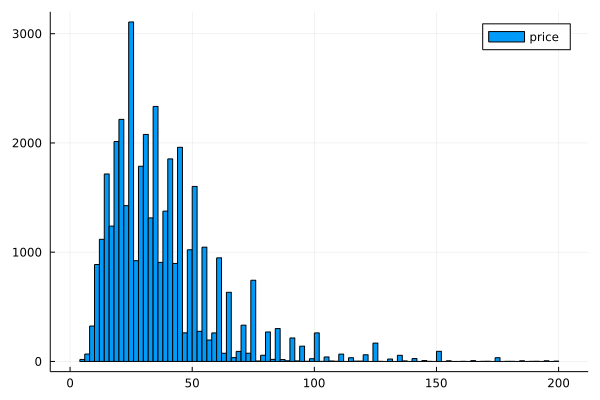

In [14]:
p4 = histogram(df[!, "price"], label="price") 

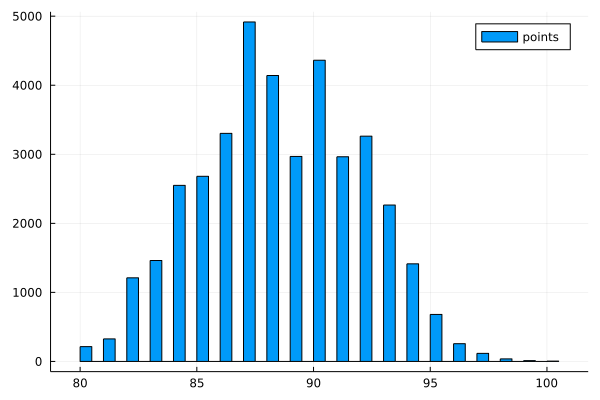

In [15]:
p4 = histogram(df[!, "points"], label="points")

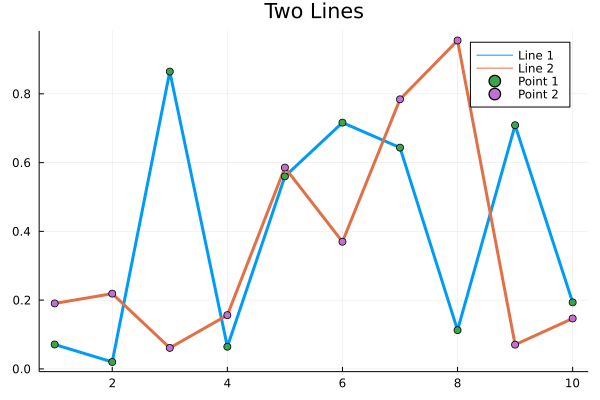

In [16]:
x = 1:10; y = rand(10, 2) # 2 columns means two lines
plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)
scatter!(x, y, label = ["Point 1" "Point 2"])

The `!` at the end of the `scatter!` function name makes `scatter!` a mutating function, indicating that the scattered points will be added onto the pre-existing plot.

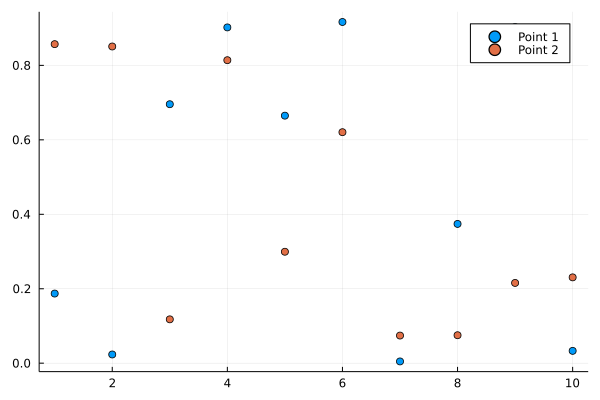

In [17]:
x = 1:10; y = rand(10, 2) # 2 columns means two lines
plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)
scatter(x, y, label = ["Point 1" "Point 2"])

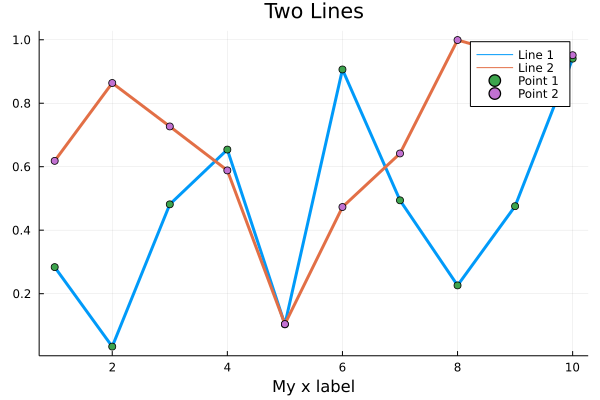

In [18]:
x = 1:10; y = rand(10, 2) # 2 columns means two lines
plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)
scatter!(x, y, label = ["Point 1" "Point 2"])
xlabel!("My x label")

y = rand(10, 4)
plot(x, y, layout = (4, 1))

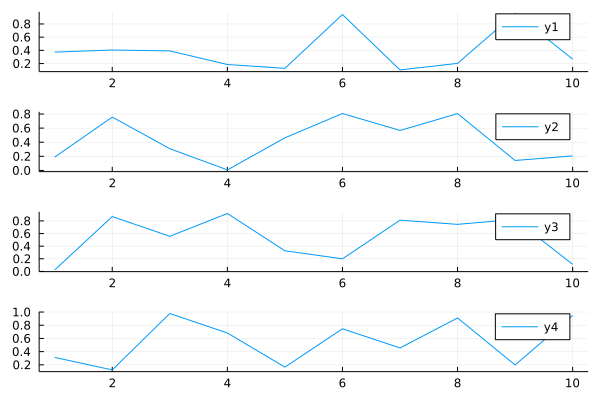

In [19]:
y = rand(10, 4)
plot(x, y, layout = (4, 1))

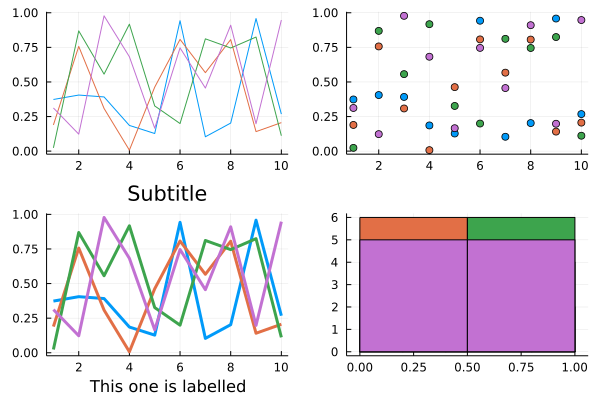

In [20]:
p1 = plot(x, y) # Make a line plot
p2 = scatter(x, y) # Make a scatter plot
p3 = plot(x, y, xlabel = "This one is labelled", lw = 3, title = "Subtitle")
p4 = histogram(x, y) # Four histograms each with 10 points? Why not!
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

   Resolving package versions...
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl

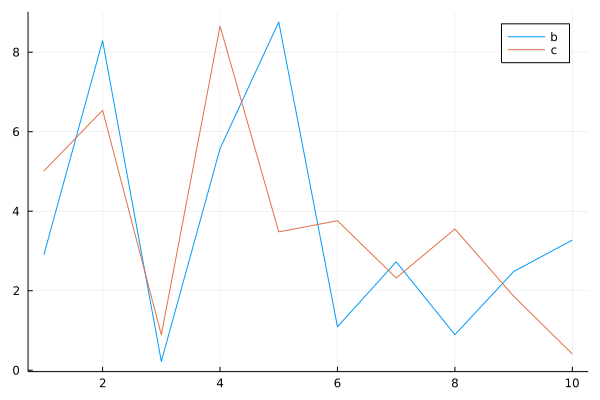

In [22]:
# Pkg.add("StatsPlots")
using StatsPlots # Required for the DataFrame user recipe
# Now let's create the DataFrame
using DataFrames
df = DataFrame(a = 1:10, b = 10 * rand(10), c = 10 * rand(10))
# Plot the DataFrame by declaring the points by the column names
@df df plot(:a, [:b :c]) # x = :a, y = [:b :c]. Notice this is two columns!

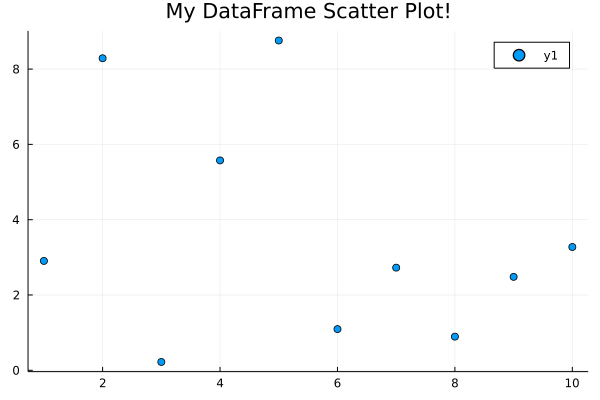

In [23]:
@df df scatter(:a, :b, title = "My DataFrame Scatter Plot!") # x = :a, y = :b

The `!` at the end of the `scatter!` function name makes `scatter!` a mutating function, indicating that the scattered points will be added onto the pre-existing plot.

In contrast, see what happens when you replace `scatter!` in the above with the non-mutating function `scatter`.

Next, let's update this plot with the `xlabel!`, `ylabel!`, and `title!` commands to add more information to our plot.

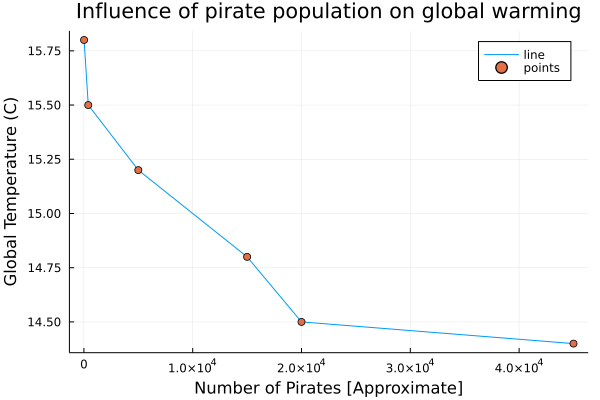

In [5]:
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")

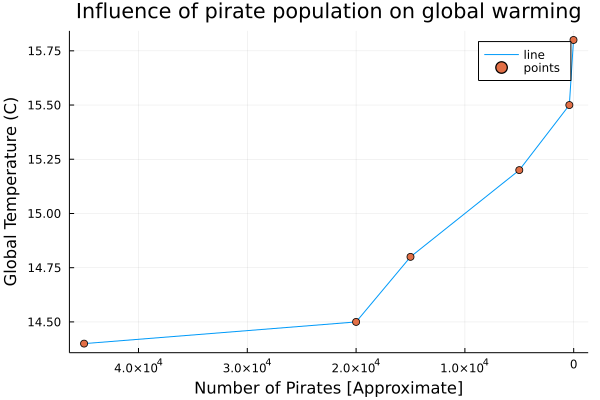

In [6]:
xflip!()

In [7]:
Pkg.add("UnicodePlots")
unicodeplots()

   Resolving package versions...
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
   Installed UnicodePlots ─ v2.5.1
    Updating `~/.julia/environments/v1.6/Project.toml`
  [b8865327] + UnicodePlots v2.5.1
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [b8865327] + UnicodePlots v2.5.1
Precompiling project...
  ✓ UnicodePlots
  1 dependency successfully precompiled in 4 seconds (144 already precompiled)


Plots.UnicodePlotsBackend()

In [8]:
plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") 
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")

                           Influence of pirate population on global warming       
                           +----------------------------------------+             
                    15.842 | ⚬                                      | line        
                           | |                                      | points      
                           | \                                      |             
                           | ⚬                                      |             
                           | |*.                                    |             
                           | | \.                                   |             
                           | |  "⚬.                                 |             
    Global Temperature (C) | |    "*.                               |             
                           | |      "*.                             |             
                           | |        "*.                           |             
    